***Name: SADDAM HUSSAIN***

***REG ID: GO_STP_6834***

---



---



Ques: **Prediction using Supervised Machine Learning using Simple Linear Regression**


In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

# Required Libraries

In [ ]:
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import data set

In [ ]:
df = pd.read_csv('/content/StudentHoursScores.csv')

In [ ]:
df.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [ ]:
df.shape

(23, 2)

In [ ]:
df.nunique()

Hours     22
Scores    22
dtype: int64

# Corelation

In [ ]:
df.corr()   #------Corelation : Dependecy of var to another
# the features which has very less value that can be removed using feature 
#    re-engineering

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


# Visualization using Scatter Plot

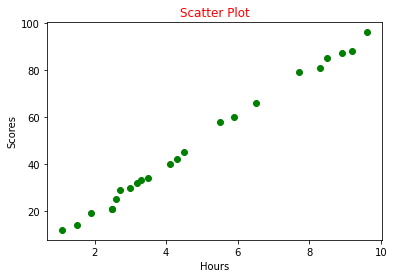

In [ ]:
X = df['Hours']
y = df['Scores']

plt.scatter(X,y, color = 'g')
plt.title('Scatter Plot', color = 'red')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

# Splitting of dataset into training and testing

In [ ]:
X = df.iloc[:,:-1].values     #indepenedent Variable or features
y = df.iloc[:,-1].values   # Dependent Var/Target Var or label

import sklearn

#Function used to divide the data to training and testing
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

# Creating simple linear model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()      # --- y = ax + b

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Predicting for the new variable
model.predict([[12]])

array([118.79562028])

In [ ]:
# Check the coeffieicnt value
model.coef_

array([9.90911438])

In [ ]:
# Check intercept value
model.intercept_

-0.11375223180673544

In [ ]:
# y  = mx + c, x = 7

x = 12

m = 9.90911438
c = -0.11375223180673544

m*x + c

118.79562032819328

# Visulaizing a model data set

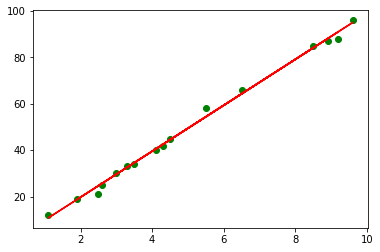

In [ ]:
plt.scatter(X_train, y_train, color = 'g', marker= 'o')
plt.plot(X_train,model.predict(X_train), color = 'r')

plt.show()

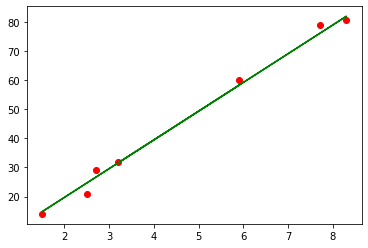

In [ ]:
# Plotting wrt to test dataset
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test,model.predict(X_test), color = 'g')

plt.show()

# R2 Score or R^2

In [ ]:
# For getting error and other functionalities
import sklearn.metrics as metrics

In [ ]:
metrics.r2_score(y_test, y_pred)   # the deviation cause by the independet var on the dependent variable

# R2 = 1-(rss/tss)

0.9931879868985266

# RMSE

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)   #y_predict-y_test for each point and all of them summed up and then divided no of data points

1.8240183891656307

In [ ]:
# Distance between the predicted and the actual
metrics.mean_squared_error(y_test,y_pred)   #y_test - y_predict for each value and square it and then sum all and then divided no of data points

# variance of the residuals

4.514279376143736

In [ ]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

# stnd devition of the residuals - has to be less as much as it can

# On an avg each data points will have this much of deviation from the observed values or the expected values or actual values or y_test

2.1246833590311134

# Joblib

Save the model

In [ ]:
# if the array is large we prefer to use joblib
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(model,'LG_Model')

['LG_Model']

Read the Model

In [ ]:
mymodel = joblib.load('LG_Model')

In [ ]:
mymodel.predict([[12]])

array([118.79562028])

# PICKLE

Save the model

In [ ]:
import pickle

In [ ]:
with open('LG_Model2','wb') as file:
  pickle.dump(model, file)

Read Model

In [ ]:
with open('LG_Model2','rb') as file:
  newmodel = pickle.load(file)

In [ ]:
newmodel.predict([[12]])

array([118.79562028])